### Loading and Inspecting the Data

In [1]:
import pandas as pd
filename = "files/001.csv"
df_all_data = pd.read_csv(filename)

In [2]:
df_all_data

,property,floors,price
0,a,3,1000
1,b,4,1500
2,c,6,3000
3,d,8,3200
4,e,2,1200
5,f,9,4000
6,g,10,4200
7,h,11,5000
8,i,12,5500
9,j,15,7000


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

Text(0, 0.5, 'price (USD)')

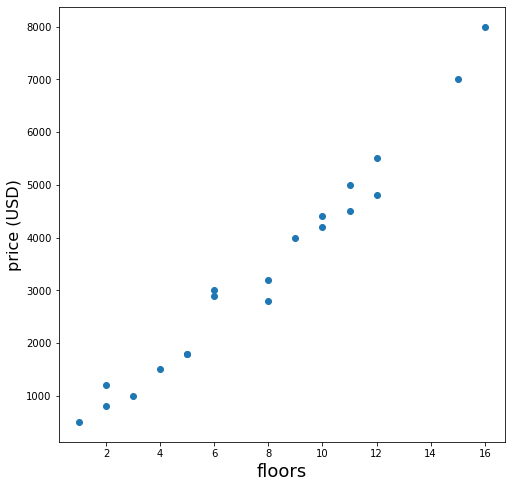

In [4]:
plt.rcParams["figure.figsize"] = (8,8) 
plt.scatter(df_all_data.floors, df_all_data.price)
plt.xlabel('floors', fontsize=18) 
plt.ylabel('price (USD)', fontsize=16) 

### Performing the train-test split

In [5]:
from sklearn.model_selection import train_test_split

X = df_all_data['floors'].values 
y = df_all_data['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [6]:
X_train

array([10, 10,  2,  6,  9, 11, 15, 11,  1,  5,  8,  3, 12,  8])

In [7]:
y_train

array([4200, 4400, 1200, 3000, 4000, 4500, 7000, 5000,  500, 1800, 3200,
       1000, 4800, 2800])

In [8]:
X_test

array([ 5,  4,  6, 12, 16,  2])

In [9]:
y_test

array([1800, 1500, 2900, 5500, 8000,  800])

### Training and Deploying a Linear Learner model

In [10]:
import sagemaker
from sagemaker import get_execution_role

session = sagemaker.Session() # Represent experiment session
role = get_execution_role() # Execution role of instance
bucket = session.default_bucket() # Refers to S3 bucket

In [11]:
from sagemaker import LinearLearner

estimator = LinearLearner(role=role,
                          instance_count=1,
                          instance_type='ml.m5.xlarge',
                          predictor_type='regressor', 
                          mini_batch_size=4)

In [12]:
record_set = estimator.record_set(train=X_train.reshape(-1,1).astype('float32'), labels=y_train.astype('float32'))

In [13]:
record_set

(<class 'sagemaker.amazon.amazon_estimator.RecordSet'>, {'s3_data': 's3://sagemaker-us-east-1-305262579855/sagemaker-record-sets/LinearLearner-2021-05-08-06-25-47-376/.amazon.manifest', 'feature_dim': 1, 'num_records': 14, 's3_data_type': 'ManifestFile', 'channel': 'train'})

In [14]:
estimator.fit(record_set)

Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.
Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


2021-05-08 06:25:47 Starting - Starting the training job...
2021-05-08 06:26:10 Starting - Launching requested ML instancesProfilerReport-1620455147: InProgress
......
2021-05-08 06:27:17 Starting - Preparing the instances for training.........
2021-05-08 06:28:37 Downloading - Downloading input data...
2021-05-08 06:29:19 Training - Training image download completed. Training in progress.
2021-05-08 06:29:19 Uploading - Uploading generated training model.Docker entrypoint called with argument(s): train
Running default environment configuration script
[05/08/2021 06:29:16 INFO 140644506744640] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/resources/default-input.json: {'mini_batch_size': '1000', 'epochs': '15', 'feature_dim': 'auto', 'use_bias': 'true', 'binary_classifier_model_selection_criteria': 'accuracy', 'f_beta': '1.0', 'target_recall': '0.8', 'target_precision': '0.8', 'num_models': 'auto', 'num_calibration_samples': '10000000', 'init_meth

In [15]:
estimator.__dict__

{'role': 'arn:aws:iam::305262579855:role/service-role/AmazonSageMaker-ExecutionRole-20210507T101941',
 'instance_count': 1,
 'instance_type': 'ml.m5.xlarge',
 'volume_size': 30,
 'volume_kms_key': None,
 'max_run': 86400,
 'input_mode': 'File',
 'tags': None,
 'metric_definitions': None,
 'model_uri': None,
 'model_channel_name': 'model',
 'code_uri': None,
 'code_channel_name': 'code',
 'sagemaker_session': <sagemaker.session.Session at 0x7f997b43c8d0>,
 'base_job_name': 'linear-learner',
 '_current_job_name': 'linear-learner-2021-05-08-06-25-47-540',
 'output_path': 's3://sagemaker-us-east-1-305262579855/',
 'output_kms_key': None,
 'latest_training_job': <sagemaker.estimator._TrainingJob at 0x7f997aa35ef0>,
 'jobs': [],
 'deploy_instance_type': None,
 '_compiled_models': {},
 'subnets': None,
 'security_group_ids': None,
 'encrypt_inter_container_traffic': False,
 'use_spot_instances': False,
 'max_wait': None,
 'checkpoint_s3_uri': None,
 'checkpoint_local_path': None,
 'rules': No

In [16]:
predictor = estimator.deploy(initial_instance_count=1,
                             instance_type='ml.t2.medium')

Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


-----------------!

In [17]:
X_test

array([ 5,  4,  6, 12, 16,  2])

In [18]:
payload = X_test.reshape(-1,1).astype('float32')
predictor.predict(payload)

[label {
   key: "score"
   value {
     float32_tensor {
       values: 1662.545166015625
     }
   }
 },
 label {
   key: "score"
   value {
     float32_tensor {
       values: 1191.4423828125
     }
   }
 },
 label {
   key: "score"
   value {
     float32_tensor {
       values: 2133.647705078125
     }
   }
 },
 label {
   key: "score"
   value {
     float32_tensor {
       values: 4960.263671875
     }
   }
 },
 label {
   key: "score"
   value {
     float32_tensor {
       values: 6844.6748046875
     }
   }
 },
 label {
   key: "score"
   value {
     float32_tensor {
       values: 249.2369384765625
     }
   }
 }]

In [19]:
predictor.delete_endpoint()

### Batch Transform

In [20]:
!mkdir -p tmp

In [21]:
import pandas as pd 

pd.DataFrame(X_test.reshape(-1,1)).to_csv("tmp/001.test.csv", header=False, index=False)

In [22]:
!cat tmp/001.test.csv

5
4
6
12
16
2


In [23]:
s3_path = session.upload_data("tmp/001.test.csv")
s3_path

's3://sagemaker-us-east-1-305262579855/data/001.test.csv'

In [24]:
transformer = estimator.transformer(
    instance_count=1,
    instance_type='ml.m5.xlarge',
    strategy='MultiRecord',
    assemble_with='Line')

Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


In [25]:
transformer.transform(s3_path, content_type='text/csv', split_type='Line')

...........................Docker entrypoint called with argument(s): serve
Running default environment configuration script
[05/08/2021 06:43:04 INFO 139834012698432] loaded entry point class algorithm.serve.server_config:config_api
[05/08/2021 06:43:04 INFO 139834012698432] loading entry points
[05/08/2021 06:43:04 INFO 139834012698432] loaded request iterator application/json
[05/08/2021 06:43:04 INFO 139834012698432] loaded request iterator application/jsonlines
[05/08/2021 06:43:04 INFO 139834012698432] loaded request iterator application/x-recordio-protobuf
[05/08/2021 06:43:04 INFO 139834012698432] loaded request iterator text/csv
[05/08/2021 06:43:04 INFO 139834012698432] loaded response encoder application/json
[05/08/2021 06:43:04 INFO 139834012698432] loaded response encoder application/jsonlines
[05/08/2021 06:43:04 INFO 139834012698432] loaded response encoder application/x-recordio-protobuf
[05/08/2021 06:43:04 INFO 139834012698432] loaded response encoder text/csv
[05/08

In [26]:
transformer.wait()

Docker entrypoint called with argument(s): serve
Running default environment configuration script
Docker entrypoint called with argument(s): serve
Running default environment configuration script
[05/08/2021 06:43:04 INFO 139834012698432] loaded entry point class algorithm.serve.server_config:config_api
[05/08/2021 06:43:04 INFO 139834012698432] loading entry points
[05/08/2021 06:43:04 INFO 139834012698432] loaded request iterator application/json
[05/08/2021 06:43:04 INFO 139834012698432] loaded request iterator application/jsonlines
[05/08/2021 06:43:04 INFO 139834012698432] loaded request iterator application/x-recordio-protobuf
[05/08/2021 06:43:04 INFO 139834012698432] loaded request iterator text/csv
[05/08/2021 06:43:04 INFO 139834012698432] loaded response encoder application/json
[05/08/2021 06:43:04 INFO 139834012698432] loaded response encoder application/jsonlines
[05/08/2021 06:43:04 INFO 139834012698432] loaded response encoder application/x-recordio-protobuf
[05/08/2021

In [27]:
transformer.output_path

's3://sagemaker-us-east-1-305262579855/linear-learner-2021-05-08-06-38-35-365'

In [28]:
!aws s3 cp {transformer.output_path}/001.test.csv.out tmp/001.test.csv.out

download: s3://sagemaker-us-east-1-305262579855/linear-learner-2021-05-08-06-38-35-365/001.test.csv.out to tmp/001.test.csv.out


In [29]:
cat tmp/001.test.csv.out

{"score":1662.545166015625}
{"score":1191.4423828125}
{"score":2133.647705078125}
{"score":4960.263671875}
{"score":6844.6748046875}
{"score":249.2369384765625}


### Exercise

**INSTRUCTION**: Prepare a DataFrame with the following columns

- X_test
- y_test
- y_predicted

In [30]:
import csv
   
filename = "tmp/001.test.csv.out"

scores = []

with open(filename,'r') as data:
    for line in csv.reader(data):
        scores.append(line[0][len("{'score':"):-1])

In [31]:
scores

['1662.545166015625',
 '1191.4423828125',
 '2133.647705078125',
 '4960.263671875',
 '6844.6748046875',
 '249.2369384765625']

In [32]:
output = pd.DataFrame(list(zip(X_test, y_test, scores)), columns = ["X_test", "y_test", "y_predicted"])
output

,X_test,y_test,y_predicted
0,5,1800,1662.545166015625
1,4,1500,1191.4423828125
2,6,2900,2133.647705078125
3,12,5500,4960.263671875
4,16,8000,6844.6748046875
5,2,800,249.2369384765625
